In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.datasets import load_boston
import seaborn as sns

In [2]:
%matplotlib inline
# 使输出的图像以更高清的方式显示
# %config InlineBackend.figure_format = 'retina'
#修复字体
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False 
#禁止警告信息
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

该数据集包含美国人口普查局收集的美国马萨诸塞州波士顿住房价格的有关信息, 数据集很小，只有506个案例。

数据集都有以下14个属性:

* CRIM--城镇人均犯罪率                                                  ------【城镇人均犯罪率】
* ZN - 占地面积超过25,000平方英尺的住宅用地比例。                         ------【住宅用地所占比例】
* INDUS - 每个城镇非零售业务的比例。                                     ------【城镇中非商业用地占比例】
* CHAS - Charles River虚拟变量（如果是河道，则为1;否则为0                 ------【查尔斯河虚拟变量，用于回归分析】
* NOX - 一氧化氮浓度（每千万份）                                         ------【环保指标】
* RM - 每间住宅的平均房间数                                              ------【每栋住宅房间数】
* AGE - 1940年以前建造的自住单位比例                                     ------【1940年以前建造的自住单位比例 】
* DIS -波士顿的五个就业中心加权距离                                       ------【与波士顿的五个就业中心加权距离】
* RAD - 径向高速公路的可达性指数                                         ------【距离高速公路的便利指数】
* TAX - 每10,000美元的全额物业税率                                       ------【每一万美元的不动产税率】
* PTRATIO - 城镇的学生与教师比例                                         ------【城镇中教师学生比例】
* B - 1000（Bk - 0.63）^ 2其中Bk是城镇黑人的比例                         ------【城镇中黑人比例】
* LSTAT - 人口状况下降％                                                ------【房东属于低等收入阶层比例】
* MEDV - 自有住房的中位数报价, 单位1000美元                               ------【自住房屋房价中位数】

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
feature_names = boston['feature_names']
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
data = boston['data']
#房价单位为1000美元
prices = boston['target']

In [7]:
#数据提取
data_df = pd.DataFrame(data,columns=feature_names)
prices_df = pd.DataFrame(prices,columns=['MEDV'])
boston_df = pd.DataFrame(data_df)
boston_df['MEDV'] = prices
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


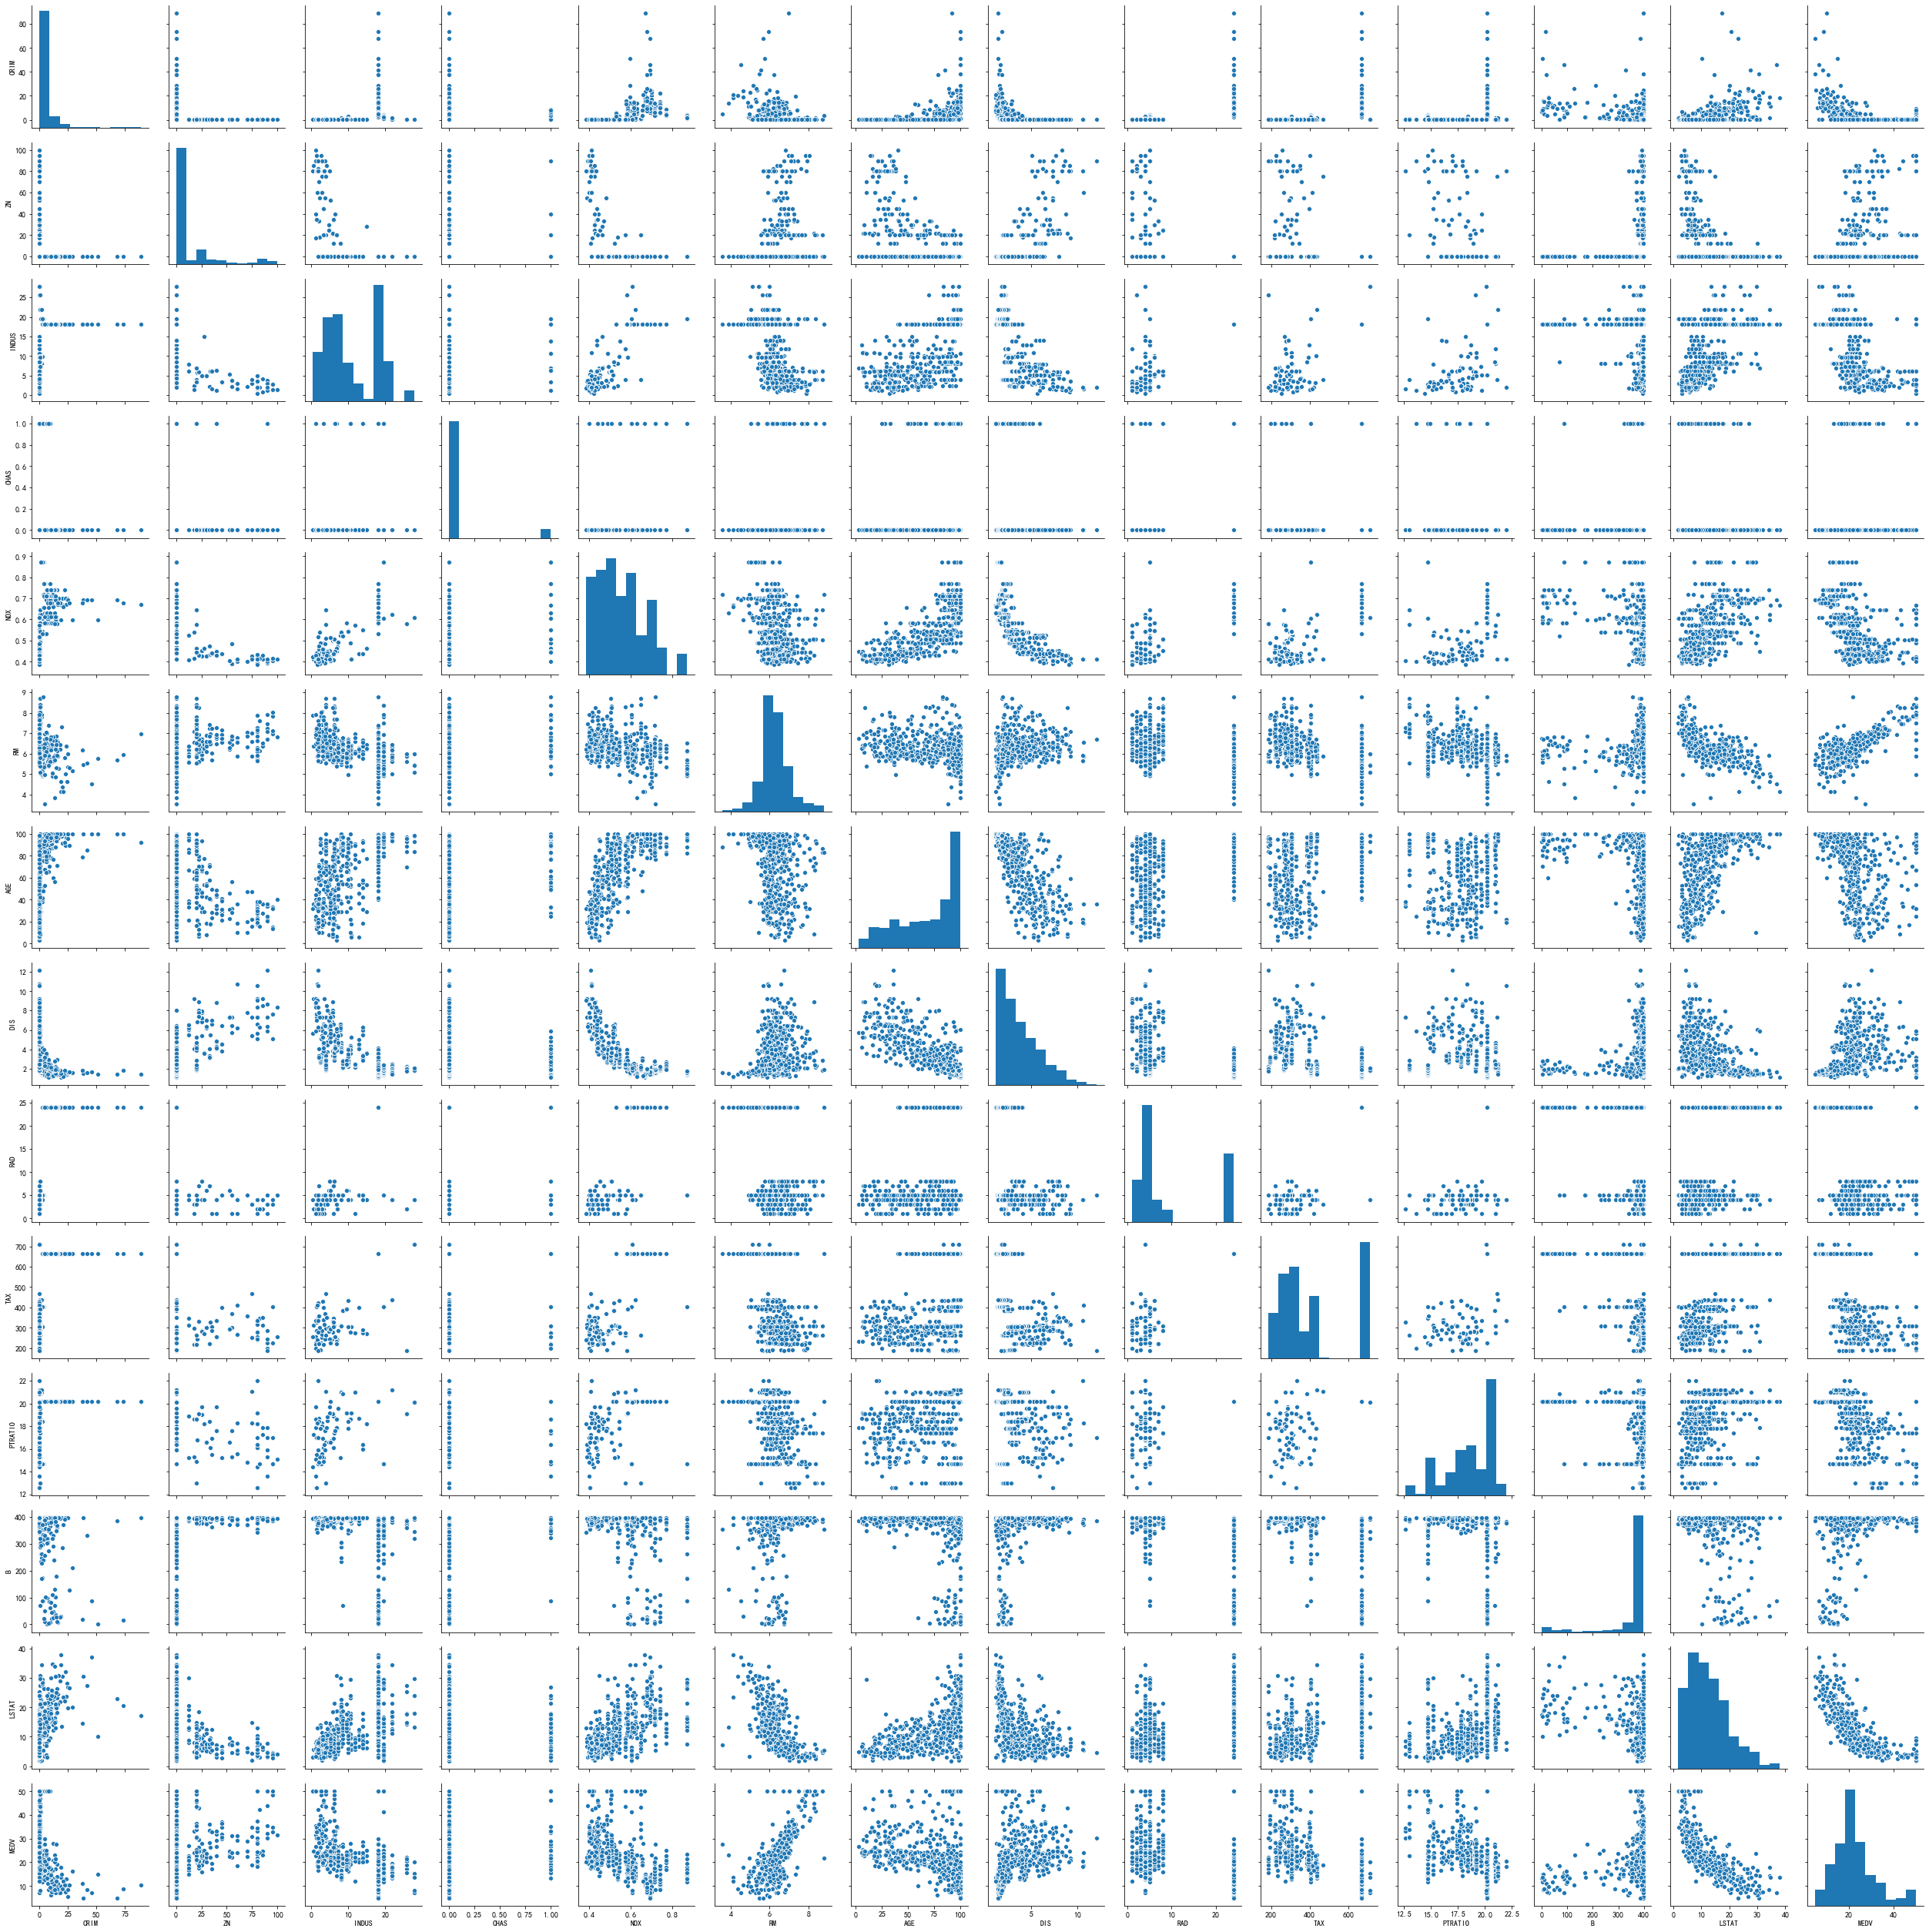

In [9]:
sns.pairplot(boston_df)
plt.tick_params(labelsize=25)
plt.savefig('pairplot.png')

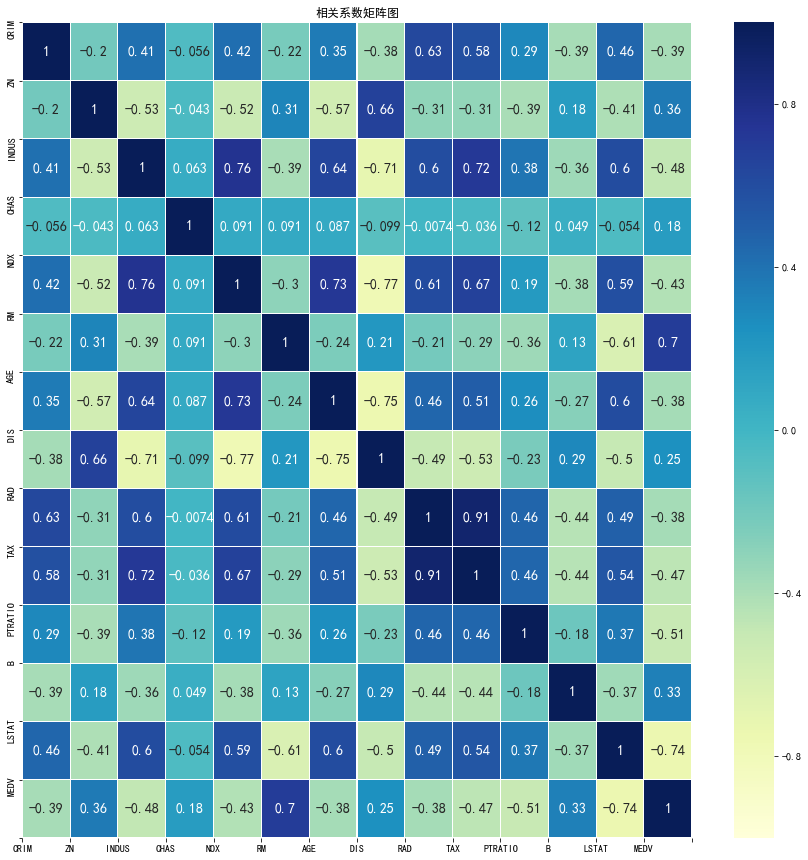

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [46]:
names = feature_names.tolist()
names.append('MEDV')
correction = boston_df.corr()
fig = plt.figure(figsize=(15,15)) 
ax = fig.add_subplot()
ax = sns.heatmap(correction,cmap='YlGnBu', linewidths=0.05,vmax=1, vmin=-1 ,annot=True,annot_kws={'size':14,'weight':'bold'})
plt.xticks(np.arange(15),names) 
plt.yticks(np.arange(15),names)
ax.set_title('相关系数矩阵图')
plt.savefig('heatmap.png')
plt.show()
correction

可以看出MEDV与ZN(0.36),CHAS(0.18),RM(0.7),DIS(0.25),B(0.33)呈正相关

In [11]:
plt.style.use({'figure.figsize':(15,10)})

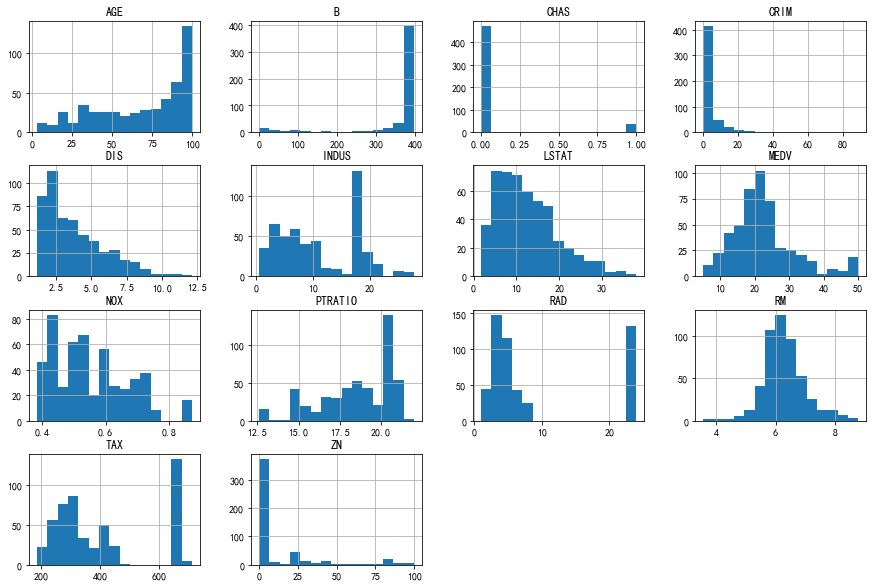

In [12]:
boston_df.hist(bins=15)
plt.savefig('hist.png')

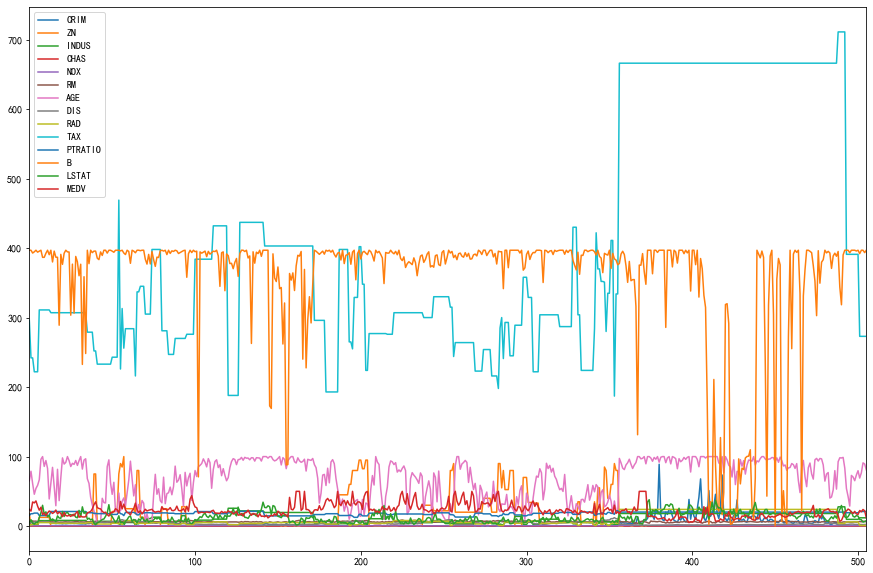

In [13]:
boston_df.plot()
plt.savefig("plot.png")

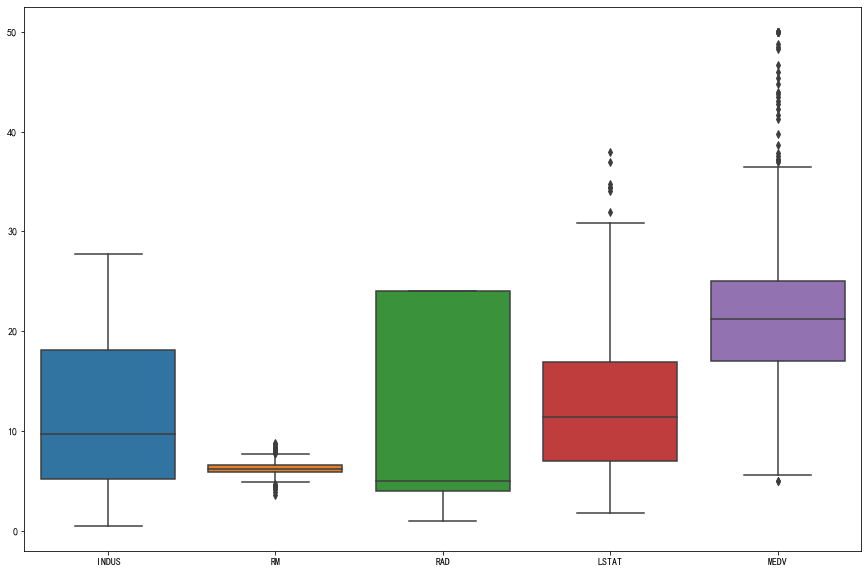

In [14]:
sns.boxplot(data=boston_df[['INDUS','RM','RAD','LSTAT','MEDV']])
plt.savefig("boxxxx.png")

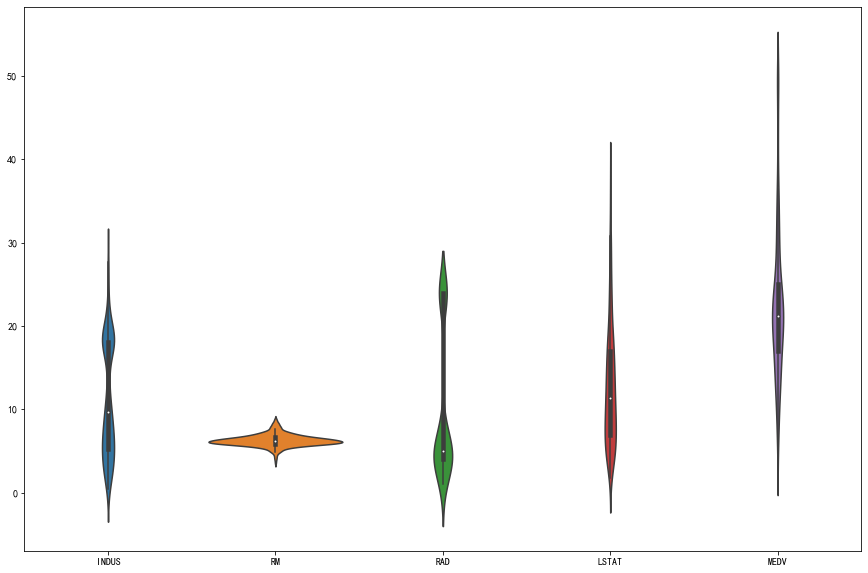

In [15]:
sns.violinplot(data=boston_df[['INDUS','RM','RAD','LSTAT','MEDV']])
plt.savefig("violin.png")

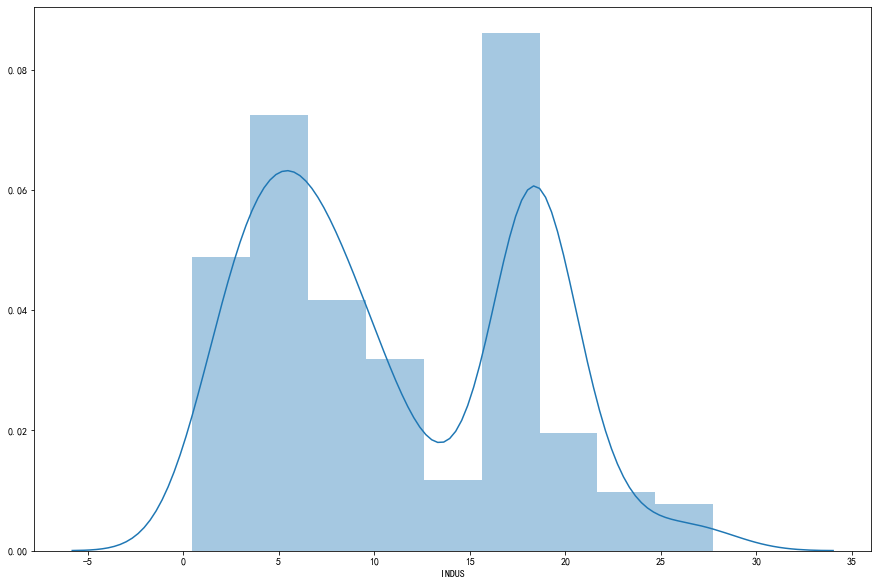

In [16]:
sns.distplot(boston_df['INDUS'])
plt.savefig('INDUS.png')

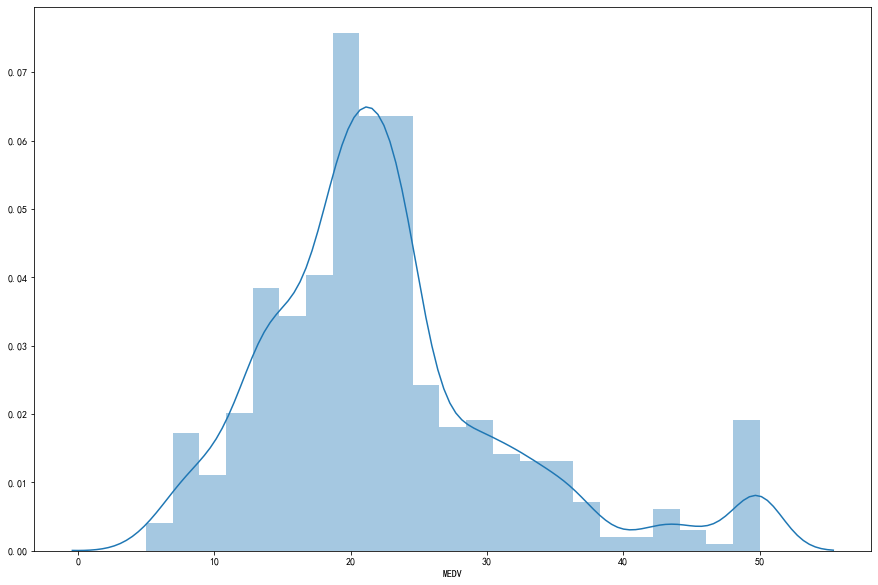

In [17]:
sns.distplot(boston_df['MEDV'])
plt.savefig('MEDV.png')

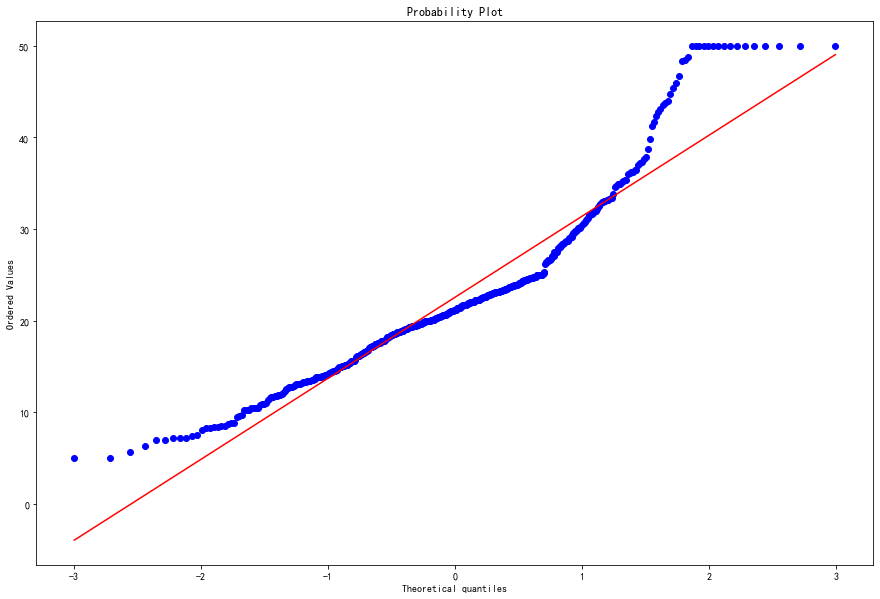

In [18]:
#正态分布验证图
from scipy import stats
res = stats.probplot(boston_df['MEDV'],plot=plt)

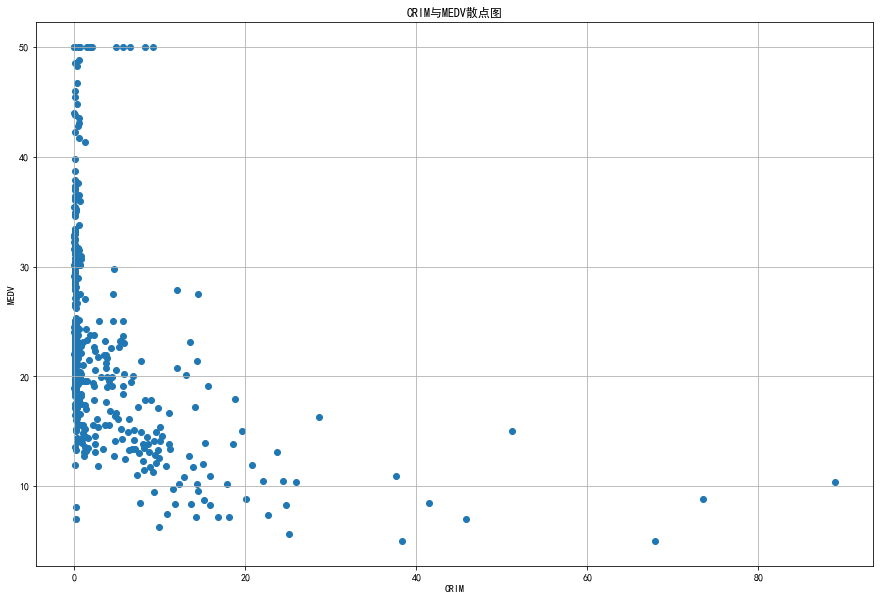

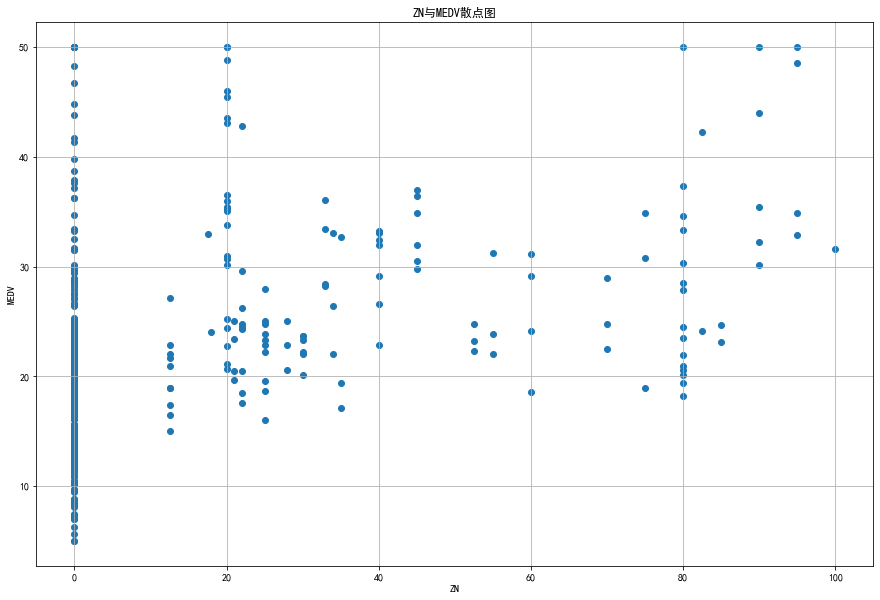

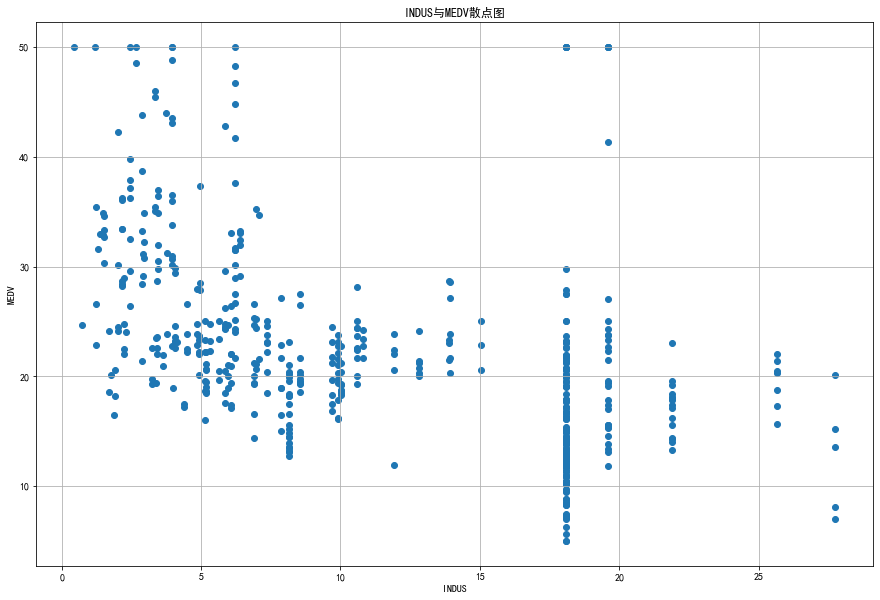

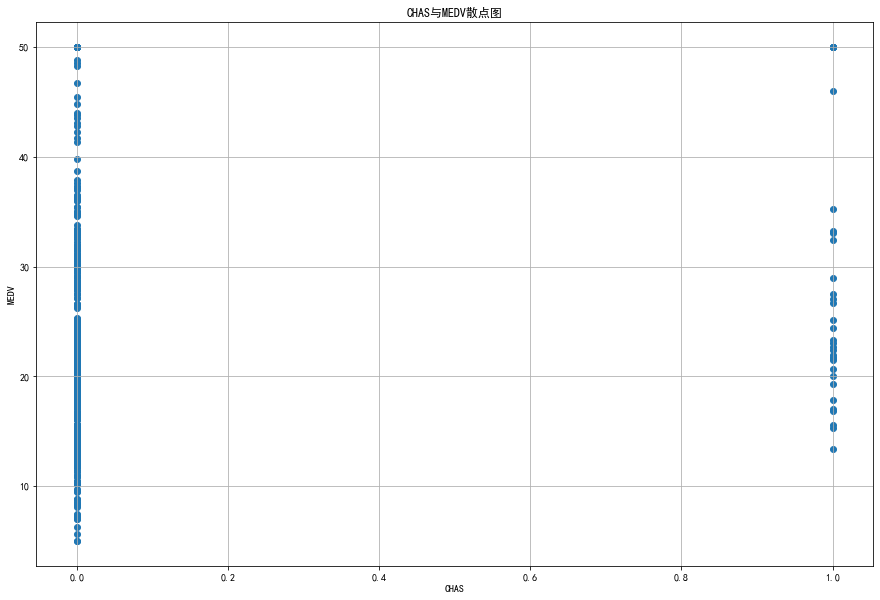

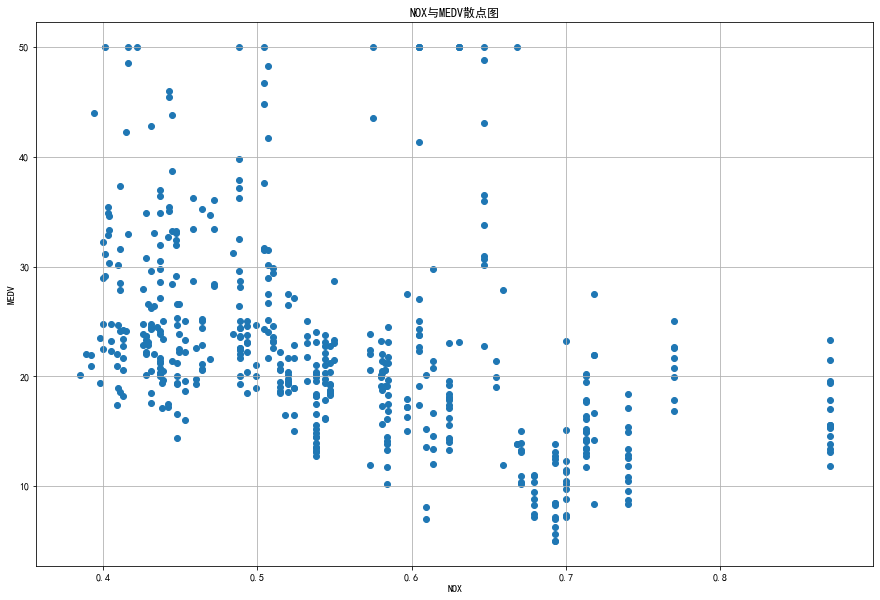

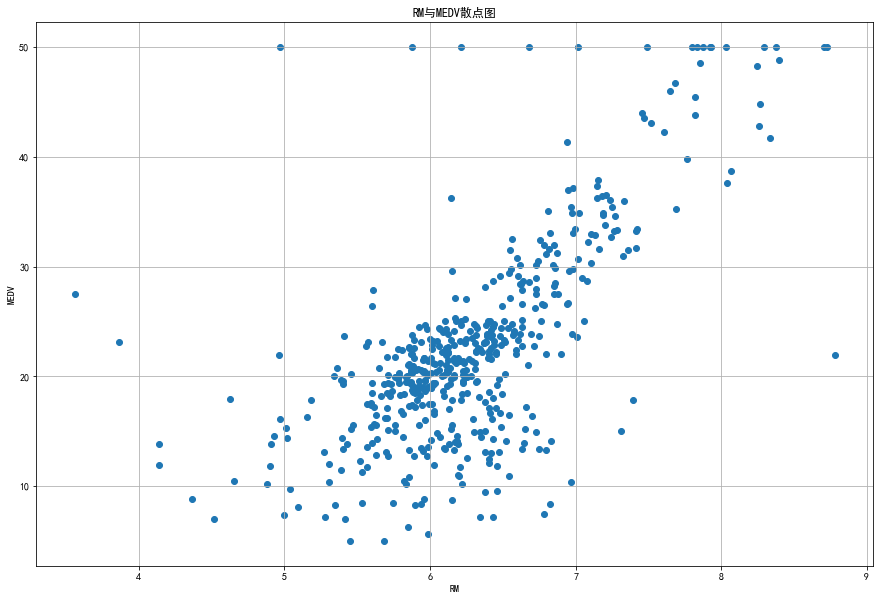

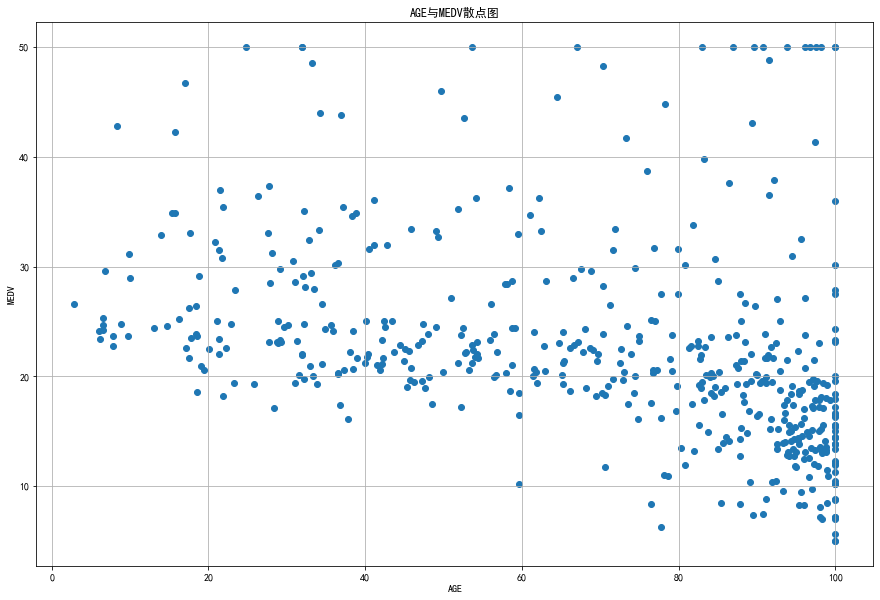

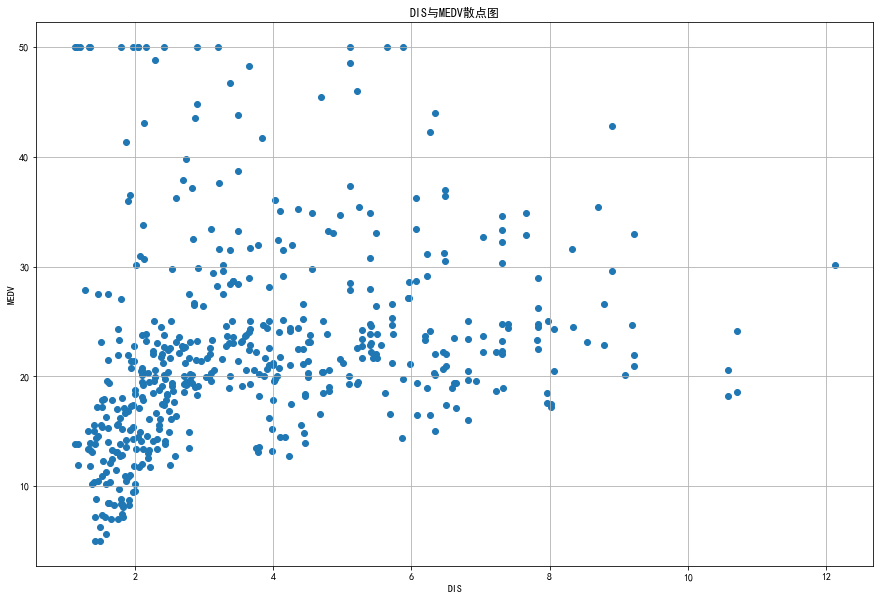

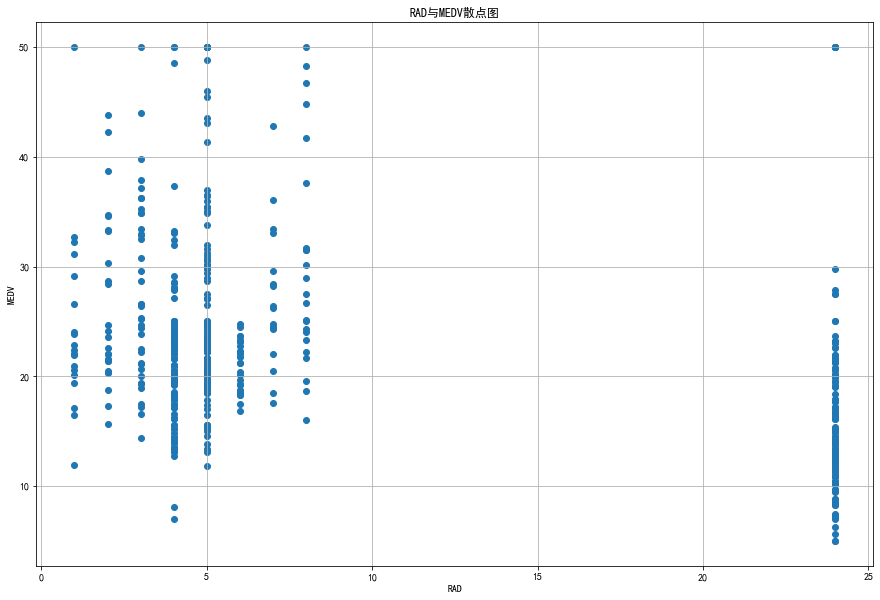

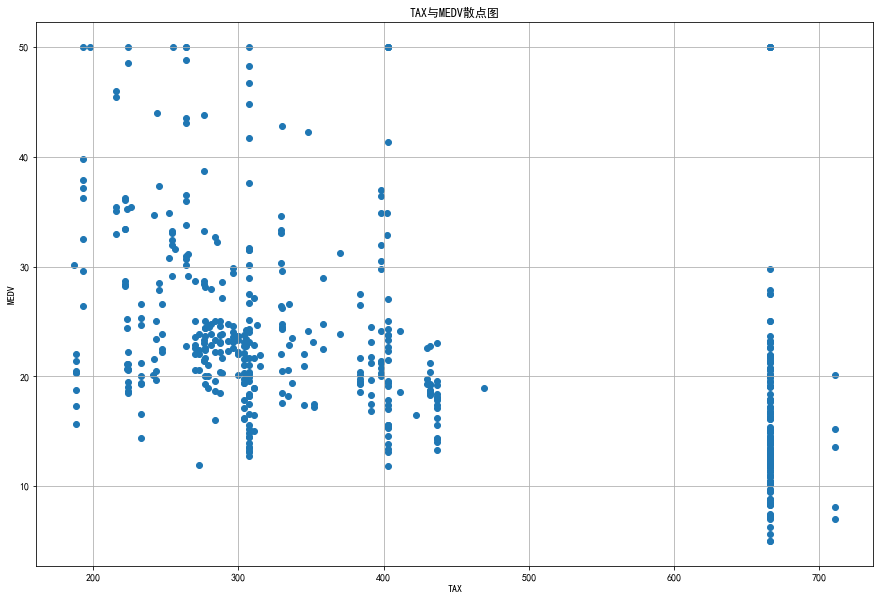

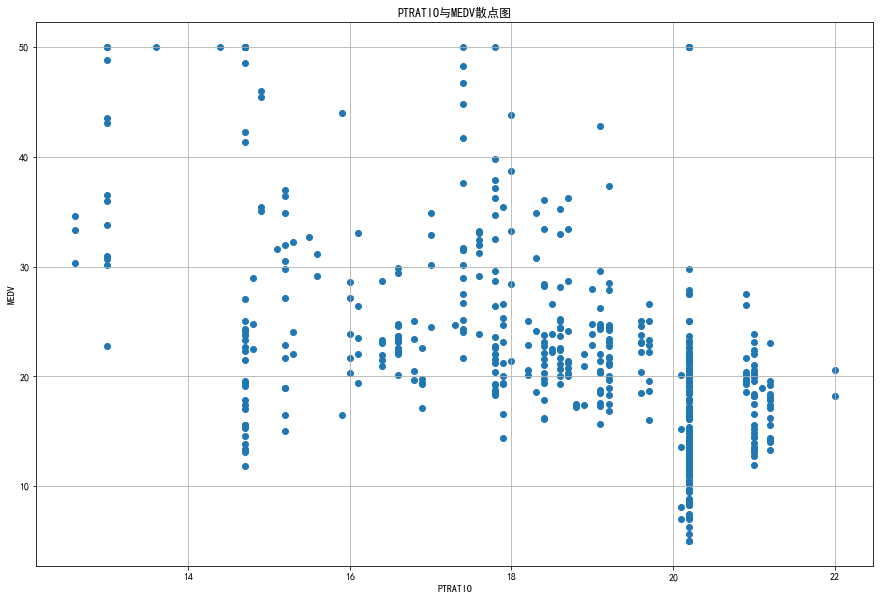

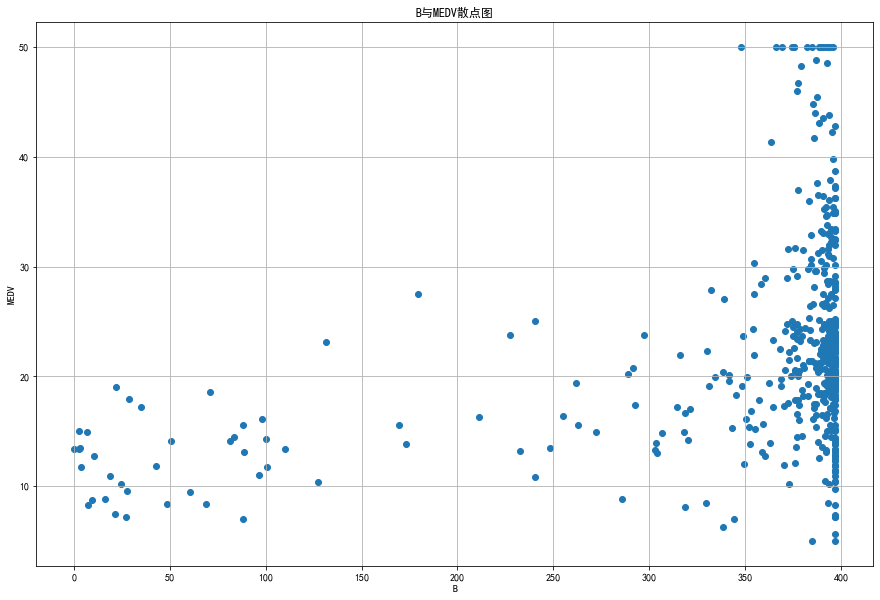

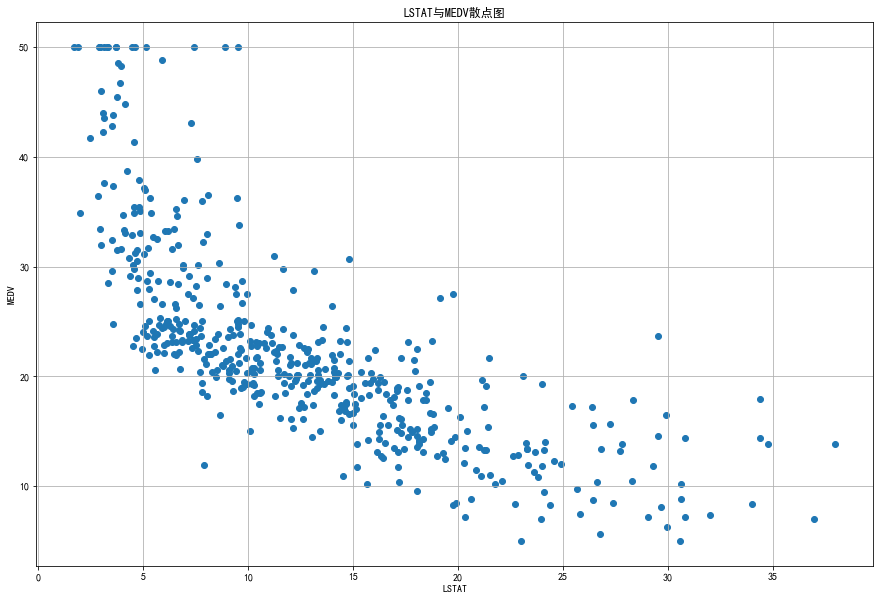

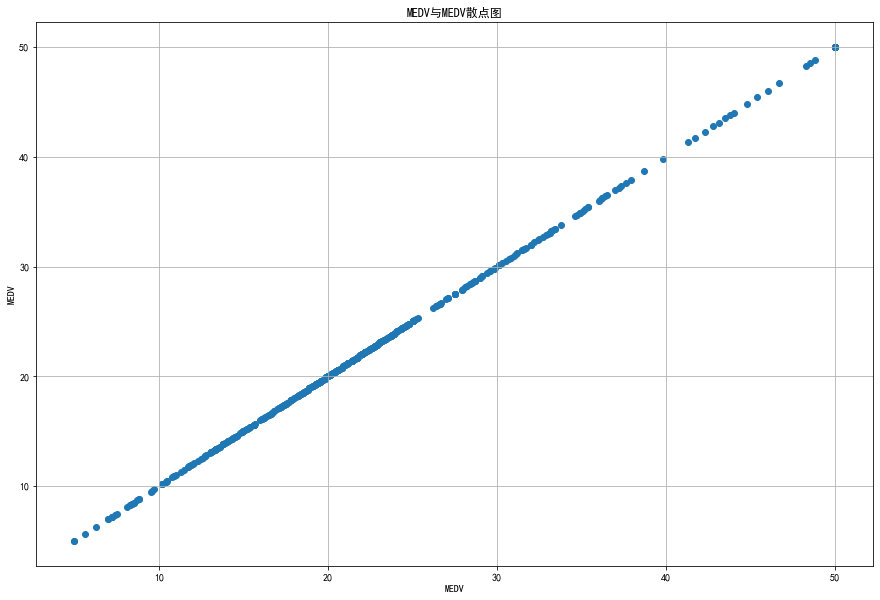

In [19]:
for each in boston_df.columns:
    plt.scatter(boston_df[each],boston_df['MEDV'])
    plt.title("{}与MEDV散点图".format(each))
    plt.xlabel(each)
    plt.ylabel('MEDV')
    plt.grid()
    plt.savefig("scatter/{}与MEDV散点图.png".format(each))
    plt.show()

## 数据标准化

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
boston_scaler = pd.DataFrame(boston_df)
for feature in boston_df.columns:
    boston_scaler[feature] = scaler.fit_transform(boston_df[[feature]])
boston_scaler.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


## 波士顿房价预测

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [22]:
X = data_df.drop(['MEDV'],axis=1)
y = data_df['MEDV']
# X = boston_scaler.drop(['MEDV'],axis=1)
# y = boston_scaler['MEDV']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

### 线性回归

In [24]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
model.score(X_test,y_test)

0.6354638433202131

In [26]:
model.coef_

array([-1.17735289e-01,  4.40174969e-02, -5.76814314e-03,  2.39341594e+00,
       -1.55894211e+01,  3.76896770e+00, -7.03517828e-03, -1.43495641e+00,
        2.40081086e-01, -1.12972810e-02, -9.85546732e-01,  8.44443453e-03,
       -4.99116797e-01])

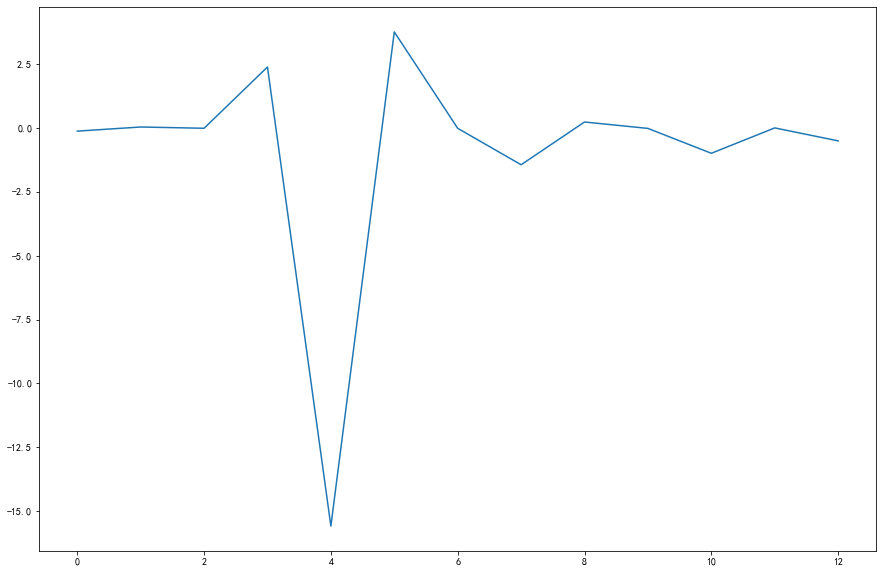

In [27]:
plt.plot(model.coef_)

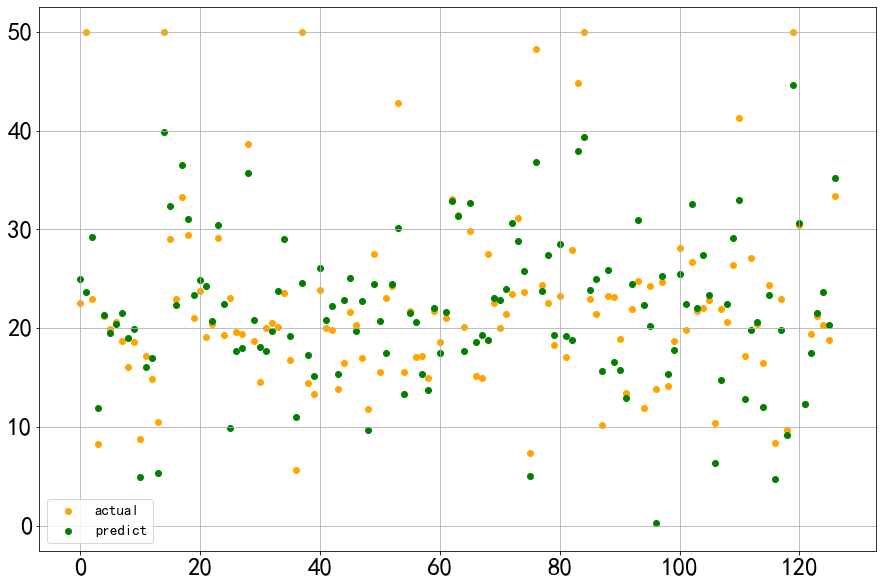

In [45]:
# #原始数据均值和标准差
# mean = data_df['MEDV'].mean()
# std = data_df['MEDV'].std()
# #还原数据
# mm = MinMaxScaler()
# y_test_origin = data_df['MEDV'][len(y_train):]
predict = model.predict(X_test)
# predict = predict*std+mean
#数据预测对比图
y_index = [x for x in range(len(y_test))]
plt.scatter(y_index,y_test,label="actual",c="orange")
plt.scatter(y_index,predict,label="predict",c="green")
plt.legend(fontsize=15,markerscale=1)
plt.tick_params(labelsize=25)
plt.grid()
plt.savefig('线性回归预测值与真实值.png')
plt.show()


In [29]:
#RMSE
RMSE = np.sum(np.sqrt((predict-y_test)**2))/len(data_df)
RMSE

0.9207073691961186

### 随机森林

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators':[5,10,20,50,100,200],#决策树的个数
    'max_depth':[3,5,7],#最大树深
    'max_features':[0.6,0.7,0.8,1]
}

rf = RandomForestRegressor()

grid = GridSearchCV(rf,param_grid=param_grid,cv=3)

grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7],
       

In [31]:
grid.best_params_

{'max_depth': 7, 'max_features': 0.6, 'n_estimators': 200}

In [32]:
rf_reg = grid.best_estimator_

In [33]:
grid.best_score_

0.8697524986711214

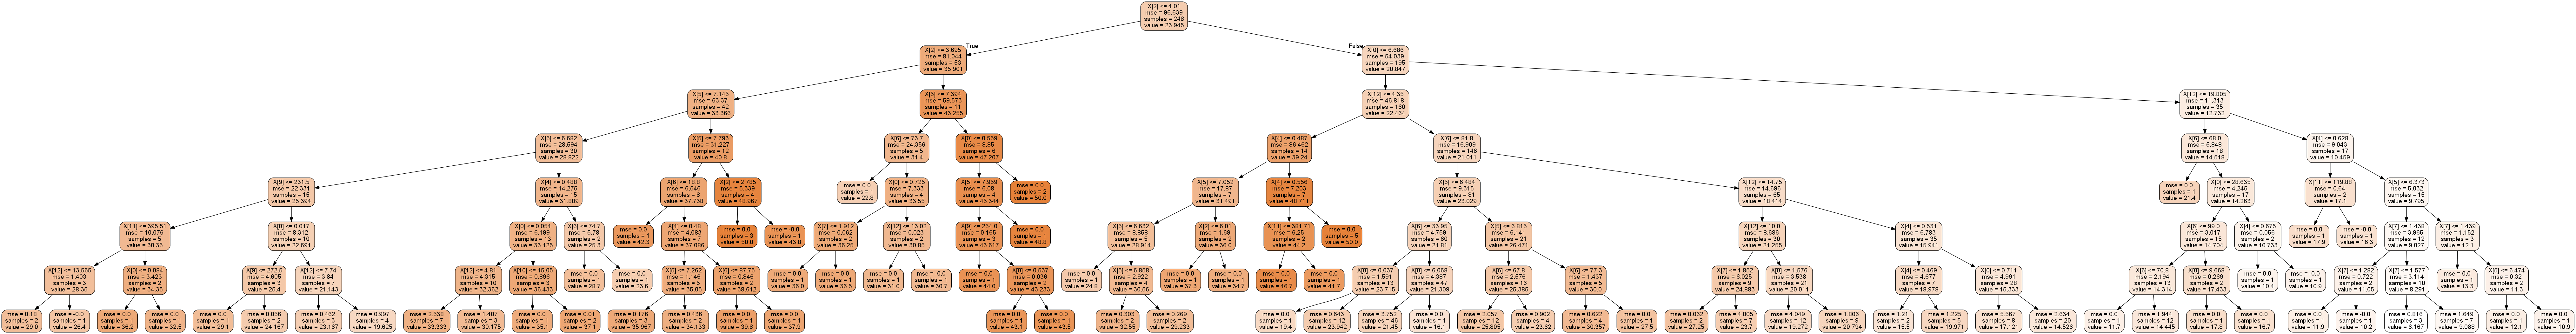

In [34]:
from sklearn import tree
import pydotplus
from IPython.display import Image,display

estimator = rf_reg.estimators_[3]
dot_data = tree.export_graphviz(estimator,out_file=None,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_pdf('boston_price_predict_tree.pdf')
display(Image(graph.create_png()))

In [35]:
rf_reg.feature_importances_

array([0.05273739, 0.00148107, 0.06716678, 0.0017808 , 0.03460437,
       0.36333663, 0.01613598, 0.03997992, 0.00572117, 0.01950467,
       0.04738099, 0.00952227, 0.34064796])

In [36]:
feature_importances = rf_reg.feature_importances_
indices = np.argsort(feature_importances)[::-1]

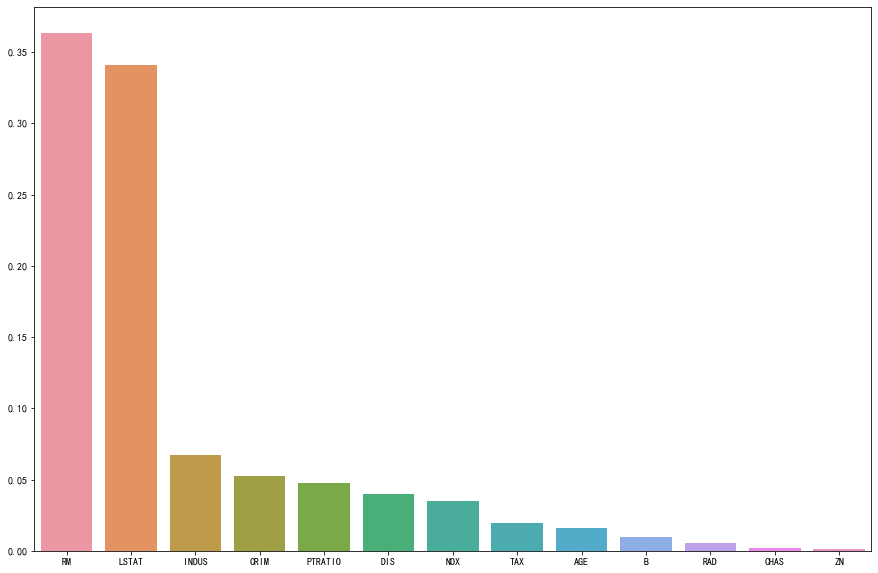

In [37]:
sns.barplot(feature_names[indices],feature_importances[indices])
plt.savefig("features_importance.png")

In [38]:
result = {'label':y_test,'prediction':rf_reg.predict(X_test)}
result = pd.DataFrame(result)

In [39]:
result.head()

,label,prediction
329,22.6,24.060347
371,50.0,25.696610
219,23.0,21.678754
403,8.3,11.140920
78,21.2,21.131255


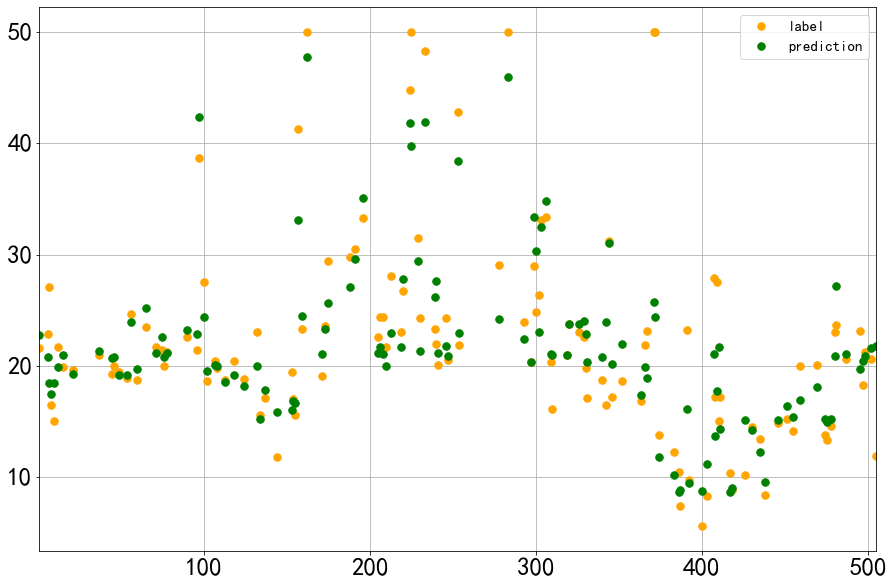

In [40]:
result['label'].plot(style='k.',c='orange',markersize=15)
result['prediction'].plot(style='r.',c='green',markersize=15)
plt.legend(fontsize=15,markerscale=1)
plt.tick_params(labelsize=25)
plt.grid()
plt.savefig("随机森林拟合结果.png")

In [41]:
MSE = metrics.mean_squared_error(y,rf_reg.predict(X))
MSE

6.669388690720565

In [42]:
RMSE = np.sqrt(MSE)
RMSE

2.5825159613680153

In [43]:
len(data_df)

506